Loading the Data

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from urllib.request import urlopen
from zipfile import ZipFile

# Download and unzip our zipfile
zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '')
# close the ZipFile instance
zf.close()

df = pd.read_csv("ecommerce_data.csv", encoding = 'ISO-8859-1')

In [108]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Cleaning the Data

In [109]:
#Here, I check for nulls
print(df.isnull().sum().sort_values(ascending=False))

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64


In [110]:
#Here, I want to drop the rows with nulls
df_new = df.dropna()

In [111]:
#Here, I check if they were dropped correctly
print(df_new.isnull().sum().sort_values(ascending=False))

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [112]:
#Yaay they were droppeddd nicely
#Now let's clean our data
df_new['Description'] = df_new['Description'].str.lower()
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'], format='%m/%d/%Y %H:%M')
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [113]:
df_new.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [114]:
#above we can see that there are quantities with minus values. Lets erase them
df_new=df_new[df_new['Quantity']>0]
df_new.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397924.000000,397924,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.420210,NaN,22.096788,1713.169877


In [115]:
#lets add sales column
df_new['Sales'] = df_new['Quantity'] * df_new['UnitPrice']
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Now lets analyse the retailer

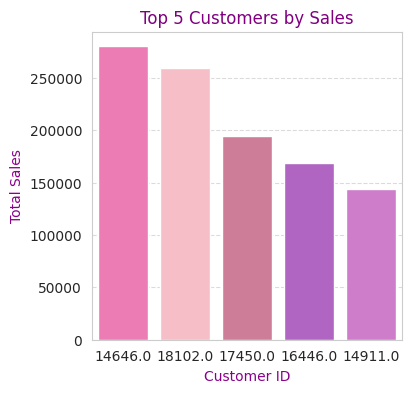

In [116]:
#I want to output best customers, countries, and seasonality
# Let's define colors
colors = ['#FF69B4', '#FFB6C1', '#DB7093', '#BA55D3', '#DA70D6']

# Top Customers by Sales
plt.figure(figsize=(4,4))
top_customers_by_sales = df_new.groupby("CustomerID")["Sales"].sum().nlargest(5).reset_index()
sns.barplot(x=top_customers_by_sales["CustomerID"].astype(str), y=top_customers_by_sales["Sales"], hue=top_customers_by_sales["CustomerID"].astype(str), palette=colors, legend=False)
plt.xlabel("Customer ID", fontsize=10, fontweight='light', color='#8B008B')
plt.ylabel("Total Sales", fontsize=10, fontweight='light', color='#8B008B')
plt.title("Top 5 Customers by Sales", fontsize=12, fontweight='light', color='#800080')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

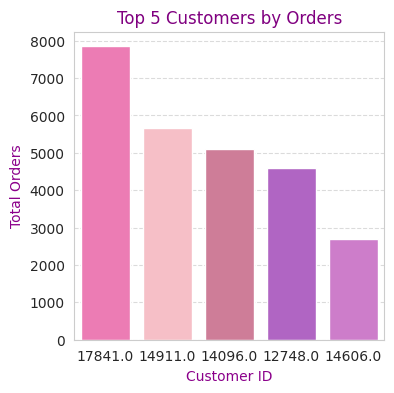

In [117]:
# Top Customers by Orders
plt.figure(figsize=(4,4))
top_customers_by_orders = df_new.groupby("CustomerID")["InvoiceNo"].count().nlargest(5).reset_index()
sns.barplot(x=top_customers_by_orders["CustomerID"].astype(str), y=top_customers_by_orders["InvoiceNo"], hue=top_customers_by_sales["CustomerID"].astype(str), palette=colors, legend=False)
plt.xlabel("Customer ID", fontsize=10, fontweight='light', color='#8B008B')
plt.ylabel("Total Orders", fontsize=10, fontweight='light', color='#8B008B')
plt.title("Top 5 Customers by Orders", fontsize=12, fontweight='light', color='#800080')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

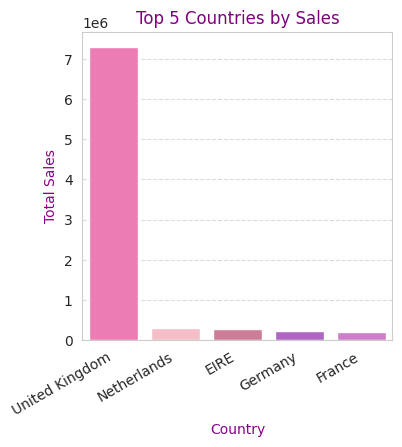

In [118]:
# Top Countries by Sales
top_countries_by_sales = df_new.groupby("Country")["Sales"].sum().nlargest(5).reset_index()
plt.figure(figsize=(4,4))
sns.barplot(x=top_countries_by_sales["Country"], y=top_countries_by_sales["Sales"], hue=top_countries_by_sales["Country"], palette=colors, legend=False)
plt.xlabel("Country", fontsize=10, fontweight='light', color='#8B008B')
plt.ylabel("Total Sales", fontsize=10, fontweight='light', color='#8B008B')
plt.title("Top 5 Countries by Sales", fontsize=12, fontweight='light', color='#800080')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

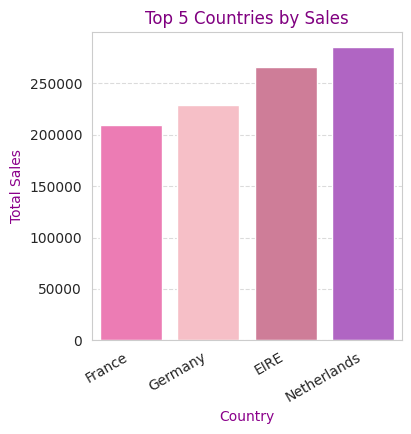

In [119]:
# Let's remove UK
group_country_sales = df_new.groupby('Country')['Sales'].sum().nlargest(5).sort_values()
group_country_sales_without_uk = group_country_sales.copy()
del group_country_sales_without_uk['United Kingdom']
group_country_sales_without_uk = group_country_sales_without_uk.reset_index()

# Top Countries by Orders without UK
plt.figure(figsize=(4,4))
sns.barplot(x=group_country_sales_without_uk["Country"], y=group_country_sales_without_uk["Sales"], hue=group_country_sales_without_uk["Country"], palette=colors, legend=False)
plt.xlabel("Country", fontsize=10, fontweight='light', color='#8B008B')
plt.ylabel("Total Sales", fontsize=10, fontweight='light', color='#8B008B')
plt.title("Top 5 Countries by Sales", fontsize=12, fontweight='light', color='#800080')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

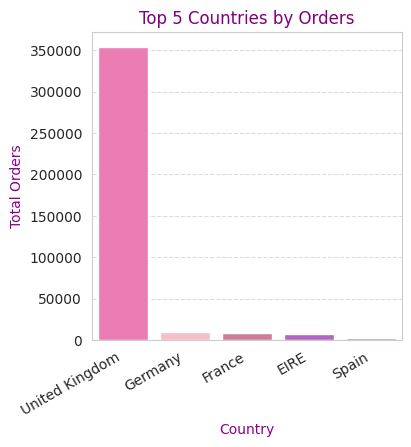

In [120]:
# Top Countries by Orders
top_countries_by_orders = df_new.groupby("Country")["InvoiceNo"].count().nlargest(5).reset_index()
plt.figure(figsize=(4,4))
sns.barplot(x=top_countries_by_orders["Country"], y=top_countries_by_orders["InvoiceNo"], hue=top_countries_by_sales["Country"], palette=colors, legend=False)
plt.xlabel("Country", fontsize=10, fontweight='light', color='#8B008B')
plt.ylabel("Total Orders", fontsize=10, fontweight='light', color='#8B008B')
plt.title("Top 5 Countries by Orders", fontsize=12, fontweight='light', color='#800080')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

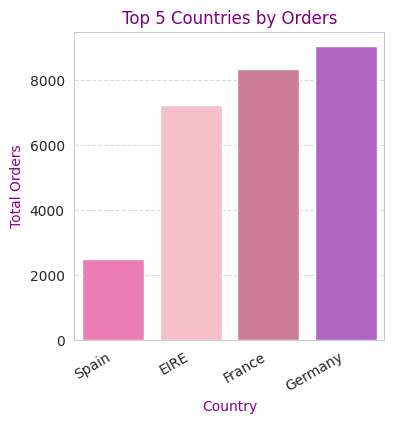

In [121]:
# Let's remove UK
group_country_orders = df_new.groupby('Country')['InvoiceNo'].count().nlargest(5).sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']
group_country_orders_without_uk = group_country_orders_without_uk.reset_index()

# Top Countries by Orders without UK
plt.figure(figsize=(4,4))
sns.barplot(x=group_country_orders_without_uk["Country"], y=group_country_orders_without_uk["InvoiceNo"], hue=group_country_orders_without_uk["Country"], palette=colors, legend=False)
plt.xlabel("Country", fontsize=10, fontweight='light', color='#8B008B')
plt.ylabel("Total Orders", fontsize=10, fontweight='light', color='#8B008B')
plt.title("Top 5 Countries by Orders", fontsize=12, fontweight='light', color='#800080')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

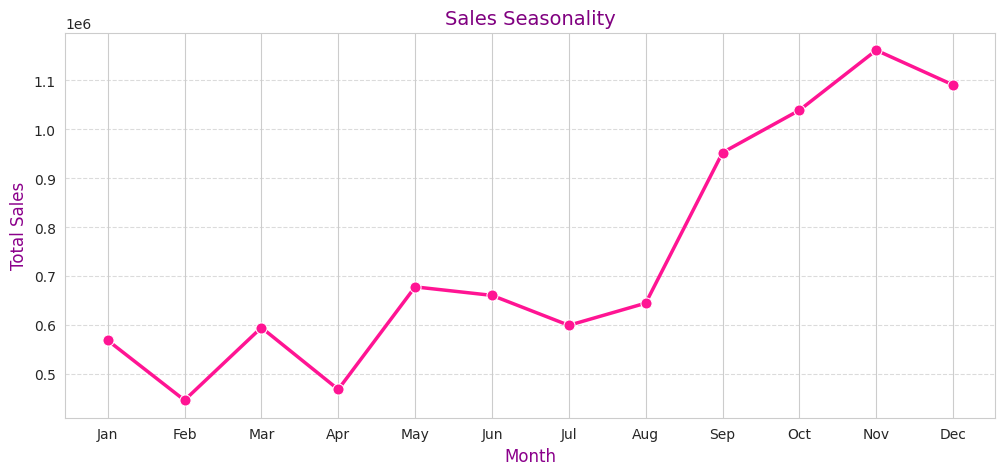

In [122]:
# Seasonality Trends
df_new["OrderDate"] = pd.to_datetime(df_new["InvoiceDate"])
df_new["Month"] = df_new["OrderDate"].dt.strftime('%b')
seasonality = df_new.groupby("Month")["Sales"].sum().reindex(
    ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
)

plt.figure(figsize=(12, 5))
sns.lineplot(x=seasonality.index, y=seasonality.values, marker='o', color='#FF1493', linewidth=2.5, markersize=8)
plt.xlabel("Month", fontsize=12, fontweight='light', color='#8B008B')
plt.ylabel("Total Sales", fontsize=12, fontweight='light', color='#8B008B')
plt.title("Sales Seasonality", fontsize=14, fontweight='light', color='#800080')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [123]:
# Now let's get quantity of each item sold per month
date_item_df = df_new.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

In [124]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

,StockCode,Quantity
2371,84826,12551
1567,23084,12393
827,22197,8458
738,22086,5919
2488,85099B,5678
2385,84879,5190
1135,22578,4981
2498,85123A,4861
1134,22577,4582
2278,84077,4500


In [135]:
# Let's look at the top 5 items sale per month

date_item_df = df_new.loc[df_new['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum().reset_index()

date_item_df

,InvoiceDate,StockCode,Quantity
0,2010-12-31,22086,1697
1,2010-12-31,22197,2110
2,2010-12-31,84826,366
3,2010-12-31,85099B,2056
4,2011-01-31,22197,1697
5,2011-01-31,84826,480
6,2011-01-31,85099B,2625
7,2011-02-28,22086,2
8,2011-02-28,22197,2505
9,2011-02-28,84826,66


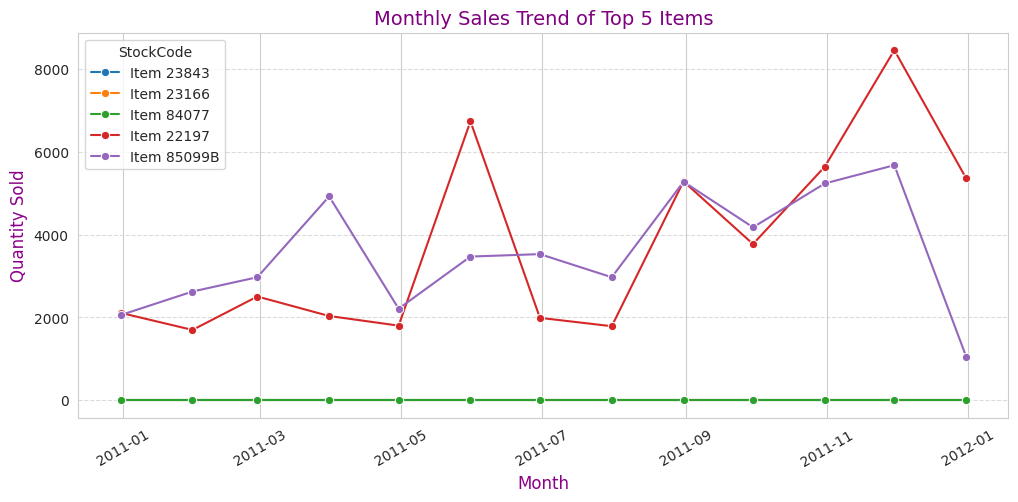

In [139]:
# Now let's generate a monthly trend of each of the top 5 items
# Pivot table to reshape data for plotting
date_item_pivot = date_item_df.pivot(index="InvoiceDate", columns="StockCode", values="Quantity").fillna(0)

# Determine top items sold
top_items = df_new.groupby("StockCode")["Quantity"].sum().nlargest(5).index.tolist()
# Reindex to ensure all top 5 items are present in the pivot table
date_item_pivot = date_item_pivot.reindex(columns=top_items, fill_value=0)

# Plot
plt.figure(figsize=(12, 5))
for item in top_items:
    sns.lineplot(x=date_item_pivot.index, y=date_item_pivot[item], label=f"Item {item}", marker="o")

plt.xlabel("Month", fontsize=12, fontweight="light", color="#8B008B")
plt.ylabel("Quantity Sold", fontsize=12, fontweight="light", color="#8B008B")
plt.title("Monthly Sales Trend of Top 5 Items", fontsize=14, fontweight="light", color="#800080")
plt.legend(title="StockCode", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30)
plt.show()